In [42]:
import os
import cv2
import shutil
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
from collections import defaultdict, Counter
import seaborn as sns
from tqdm import tqdm
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import shutil
import os

path = '/content/processed'

if os.path.exists(path):
    shutil.rmtree(path)
    print("Tudo apagado de /content/processed.")
else:
    print("Pasta não existe.")


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/captcha/processed.zip'
extract_path = '/content/processed'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

## Carregar os datasets a partir das pastas

In [ ]:
img_size = (36, 50)
batch_size = 32

train_dir = os.path.join(extract_path, 'treinamento')
val_dir   = os.path.join(extract_path, 'validacao')
test_dir  = os.path.join(extract_path, 'teste')

train_ds = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=True
)

val_ds = image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=True
)

test_ds = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=False  # Importante para matriz de confusão
)

In [ ]:
model = models.Sequential([
    layers.Input(shape=img_size + (1,)),
    layers.Rescaling(1./255),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_ds.element_spec[1].shape[1], activation='softmax')
])

# Callback para parar o treino quando a validação piorar
early_stop = EarlyStopping(
    monitor='val_loss',          # ou 'val_accuracy'
    patience=3,                  # quantas épocas esperar sem melhora
    restore_best_weights=True
)

# Callback para salvar o melhor modelo
ckpt = ModelCheckpoint(
    filepath='/content/drive/MyDrive/captcha/melhor_modelo.h5',
    monitor='val_loss',
    save_best_only=True
)

# Compilação do modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stop, ckpt],
    verbose=1
)


In [48]:

# 📍 Análise pós-treino
best_epoch = np.argmin(history.history['val_loss']) + 1
best_val_loss = np.min(history.history['val_loss'])
best_val_acc = np.max(history.history['val_accuracy'])

print(f"\n✅ Treinamento interrompido por EarlyStopping.")
print(f"Melhor época: {best_epoch}")
print(f"Melhor val_loss: {best_val_loss:.4f}")
print(f"Melhor val_accuracy: {best_val_acc:.4f}")
print(f"Total de épocas executadas: {len(history.history['loss'])}")



✅ Treinamento interrompido por EarlyStopping.
Melhor época: 6
Melhor val_loss: 0.2120
Melhor val_accuracy: 0.9494
Total de épocas executadas: 11


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9416 - loss: 0.2438

Test accuracy: 0.9443


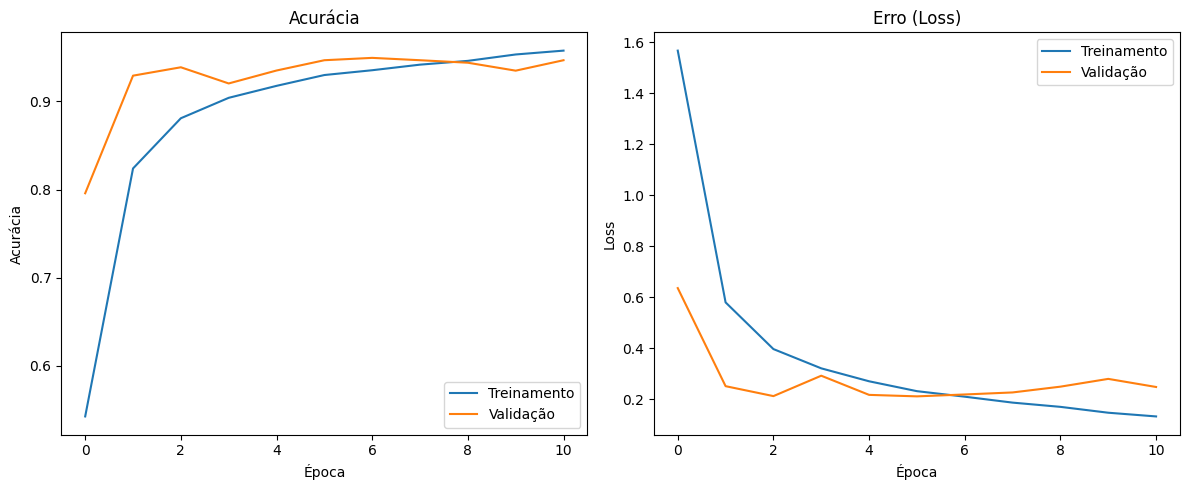

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━

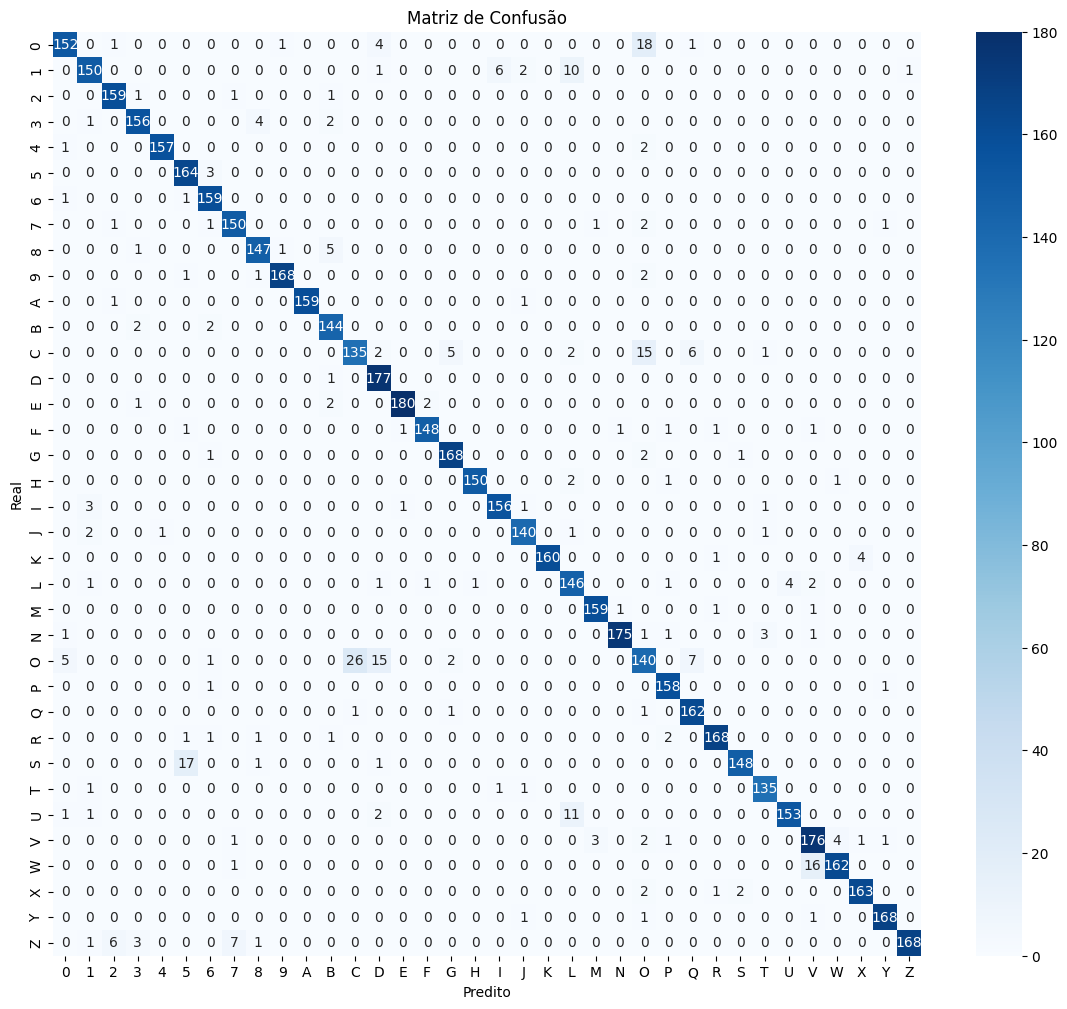

In [50]:
# 6. Avaliação final
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nTest accuracy: {test_acc:.4f}")

# 7. Gráficos de treino
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Treinamento')
plt.plot(epochs_range, val_acc, label='Validação')
plt.title('Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Treinamento')
plt.plot(epochs_range, val_loss, label='Validação')
plt.title('Erro (Loss)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 8. Matriz de confusão
class_names = train_ds_raw.class_names  # Corrigido aqui
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

conf_matrix = tf.math.confusion_matrix(y_true, y_pred, num_classes=len(class_names))

plt.figure(figsize=(14, 12))
sns.heatmap(conf_matrix.numpy(), xticklabels=class_names, yticklabels=class_names,
            annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [36]:
import zipfile

zip_path = '/content/drive/MyDrive/captcha/sequencial.zip'
extract_path = '/content/sequencial'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [44]:
img_size = (36, 50)
batch_size = 64

# Augmentação só no treino
data_augmentation = keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2),
    layers.RandomTranslation(0.1, 0.1)
])

# Carregar os datasets
train_ds = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=True
).map(lambda x, y: (data_augmentation(x, training=True), y))

val_ds = image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=True
)

test_ds = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=False
)


Found 47868 files belonging to 36 classes.
Found 5994 files belonging to 36 classes.
Found 5994 files belonging to 36 classes.


In [47]:
img_size = (36, 50)
batch_size = 64

# Augmentação só no treino
data_augmentation = keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2),
    layers.RandomTranslation(0.1, 0.1)
])

# Carregar o dataset de treino bruto (para obter as classes)
train_ds_raw = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=True
)

num_classes = len(train_ds_raw.class_names)

# Aplicar augmentação após carregar
train_ds = train_ds_raw.map(lambda x, y: (data_augmentation(x, training=True), y))
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Validação
val_ds = image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=True
).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Teste
test_ds = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=False
).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Modelo CNN estilo VGG
model = keras.Sequential([
    layers.Input(shape=img_size + (1,)),
    layers.Rescaling(1./255),

    # Bloco 1
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    # Bloco 2
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    # Bloco 3
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    # Classificador
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compilação
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
ckpt = keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/captcha/modelo_vgg_robusto.h5',
    monitor='val_accuracy',
    save_best_only=True
)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Treinamento
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stop, ckpt]
)

Found 47868 files belonging to 36 classes.
Found 5994 files belonging to 36 classes.
Found 5994 files belonging to 36 classes.
Epoch 1/50
748/748 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3511 - loss: 2.5436

748/748 ━━━━━━━━━━━━━━━━━━━━ 48s 50ms/step - accuracy: 0.3513 - loss: 2.5423 - val_accuracy: 0.7958 - val_loss: 0.6362
Epoch 2/50
747/748 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8003 - loss: 0.6528

748/748 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8004 - loss: 0.6526 - val_accuracy: 0.9293 - val_loss: 0.2520
Epoch 3/50
747/748 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8716 - loss: 0.4263

748/748 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.8716 - loss: 0.4263 - val_accuracy: 0.9388 - val_loss: 0.2130
Epoch 4/50
748/748 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.8995 - loss: 0.3434 - val_accuracy: 0.9204 - val_loss: 0.2929
Epoch 5/50
748/748 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9145 - loss: 0.2794 - val_accuracy: 0.9351 - val_loss: 0.2179
Epoch 6/50
747/748 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9282 - loss: 0.2399

748/748 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9282 - loss: 0.2399 - val_accuracy: 0.9468 - val_loss: 0.2120
Epoch 7/50
747/748 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9363 - loss: 0.2086

748/748 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9363 - loss: 0.2086 - val_accuracy: 0.9494 - val_loss: 0.2194
Epoch 8/50
748/748 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.9395 - loss: 0.1946 - val_accuracy: 0.9468 - val_loss: 0.2274
Epoch 9/50
748/748 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9457 - loss: 0.1755 - val_accuracy: 0.9439 - val_loss: 0.2500
Epoch 10/50
748/748 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9513 - loss: 0.1530 - val_accuracy: 0.9349 - val_loss: 0.2805
Epoch 11/50
748/748 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9563 - loss: 0.1369 - val_accuracy: 0.9468 - val_loss: 0.2488


Carregando imagens: 100%|██████████| 5994/5994 [00:00<00:00, 8969.46it/s]


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

Distribuição de acertos por CAPTCHA:
0 caracteres certos: 851 CAPTCHAs
1 caracteres certos: 135 CAPTCHAs
2 caracteres certos: 12 CAPTCHAs
3 caracteres certos: 1 CAPTCHAs
4 caracteres certos: 0 CAPTCHAs
5 caracteres certos: 0 CAPTCHAs
6 caracteres certos: 0 CAPTCHAs


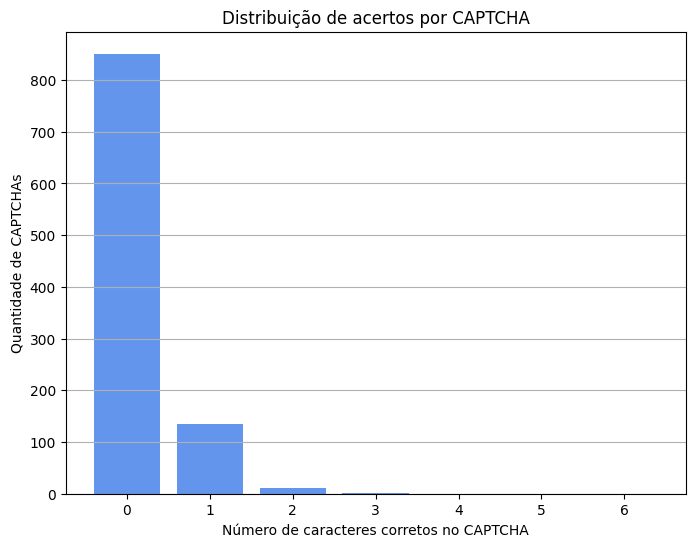

In [55]:

# Carrega o modelo
model = keras.models.load_model('/content/drive/MyDrive/captcha/melhor_modelo.h5')

# Configurações
img_size = (36, 50)
sequencial_path = '/content/sequencial'

class_names = train_ds_raw.class_names


# Pré-carregar todas as imagens e metadados
arquivos = sorted([f for f in os.listdir(sequencial_path) if f.endswith('.jpg')])
imgs = []
metadados = []

for filename in tqdm(arquivos, desc='Carregando imagens'):
    parts = filename.split('_')
    captcha_id = parts[0]
    position = int(parts[1])
    label_real = parts[2].split('.')[0]

    img_path = os.path.join(sequencial_path, filename)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size[1], img_size[0]))
    img = img / 255.0
    img = img.reshape(*img_size, 1)

    imgs.append(img)
    metadados.append((captcha_id, position, label_real))

imgs_np = np.array(imgs)

# Predição vetorizada
preds_probs = model.predict(imgs_np, batch_size=128, verbose=1)
preds_indices = np.argmax(preds_probs, axis=1)
preds_labels = [class_names[i] for i in preds_indices]

# Reorganiza por CAPTCHA
predictions = defaultdict(list)
ground_truth = defaultdict(list)

for (captcha_id, position, label_real), pred_label in zip(metadados, preds_labels):
    predictions[captcha_id].append((position, pred_label))
    ground_truth[captcha_id].append((position, label_real))

# Ordena
for cid in predictions:
    predictions[cid].sort()
    ground_truth[cid].sort()

# Avaliação
acertos_por_captcha = []
for cid in predictions:
    pred = [p[1] for p in predictions[cid]]
    real = [r[1] for r in ground_truth[cid]]
    acertos = sum([p == r for p, r in zip(pred, real)])
    acertos_por_captcha.append(acertos)

# Estatísticas
contador = Counter(acertos_por_captcha)

print("\nDistribuição de acertos por CAPTCHA:")
for i in range(7):
    print(f"{i} caracteres certos: {contador.get(i, 0)} CAPTCHAs")

# Gráfico
plt.figure(figsize=(8,6))
plt.bar(range(7), [contador.get(i, 0) for i in range(7)], color='cornflowerblue')
plt.xlabel('Número de caracteres corretos no CAPTCHA')
plt.ylabel('Quantidade de CAPTCHAs')
plt.title('Distribuição de acertos por CAPTCHA')
plt.xticks(range(7))
plt.grid(axis='y')
plt.show()